
# INDEX<a name="INDEX"></a>
---
+ [초기설정(필수)](#초기설정)
+ [심볼리스트 생성](#init)
+ [데이터 다운로드](#down)
+ [OLS 초기설정](#ols)
    + [1 변수](#1ols)
    + [2 변수](#2ols)
    + [3 변수](#3ols)
    + [4 변수](#4ols)
+ [Joint Plot](#joint)
+ [데이터확인](#확인)
+ [co-kurtosis - WIP](#cokur)

---

## Goal
미국 시장과 한국 시장의 관계 - IT하드웨어 대상

---

## Status
ols 결과 유의미한 R-squared 를 얻지못함


## Note
---
+ read_csv 에서 오류가 난다면 Analyze.py에

```pytho
engine = 'python'
```
를 추가해 줘보자.

```python
pd.read_csv('data/'+target_1 + '.csv',index_col='Date',engine='python')
```

+ csv 파일이 제대로 되어있는지 확인하여보자  
        메모장으로 열었을 시에 제대로 ',' 로 구분되어야한다.  
        엑셀 파일을 받아서 csv로 변환이 잘 안되는 경우가 있다.

+ 출력이 스크롤 안에 안 들어가게 하기  
        Cell -> All output (또는 Current outputs) -> toggle scrolling  
        또는 cell 선택후 'o'

### [초기 설정](#INDEX)<a name="초기설정"></a>
+ 한글 출력을 위한 폰트 설정, 각 PC마다 환경이 다름 (matlplot 한글폰트.ipynb 참고)
+ 사용할 지표들 등록

In [1]:
import SymbolList as sl
import Analyze as an
import numpy as np
import pandas as pd
import datetime as dt 
from statsmodels.formula.api import ols 
import seaborn as sns;  sns.set()
import matplotlib.pyplot as plt
import matplotlib as mpl

# matplot 설정
mpl.rcParams['axes.unicode_minus'] = False
# -*- coding: utf-8 -*-
plt.rc('font', family="LG PC")
# 리스트 설정
ten_kor = ['Samsung_Electronics','SK_hynix','LG_Electronics',
    '삼성SDI','엔씨소프트','카카오','삼성전기',
    'LG디스플레이','삼성SDS','네이버']
ten_US = [  'Apple','Microsoft','IBM','Oracle',
            'Amazon','Tesla','Alphabet','Facebook',
            'Cisco','타이완 반도체','Intel','오라클','SAP']
index_kor = '와이즈'
#index_US = 'IXT'
index_US = 'XLK'
#stan_US = ['IXT','VIX','BitCoin','MSCI','ten_Year_Treasury']
stan_US = ['XLK','VIX','BitCoin','MSCI','ten_Year_Treasury']

### 지표 설명
+ [와이즈](http://www.wiseindex.com/Index/Index#/WI610.0) - 와이즈 IT하드웨어 지수
+ [IXT](https://finance.yahoo.com/quote/%5EIXT?p=^IXT&.tsrc=fin-srch) : TECHNOLOGY SELECT SECTOR INDEX  - 현재 미사용, 온전한 3년치를 얻을 방법을 못 찾음
+ [XLK](https://finance.yahoo.com/quote/XLK?p=XLK&.tsrc=fin-srch): Technology Select Sector SPDR Fund 
+ [VIX](https://finance.yahoo.com/quote/ZM?p=ZM&.tsrc=fin-srch) : VelocityShares Daily 2x VIX Short-Term ETN(a.k.a 공포지수), S&P500지수 옵션 가격의 향후 30일 동안의 변동성에 대한 시장의 기대
+ [MSCI](https://finance.yahoo.com/quote/EEM?p=EEM&.tsrc=fin-srch) : iShares MSCI Emerging Markets ETF
+ [ten_Year_Treasury](https://finance.yahoo.com/quote/IEF?p=IEF&.tsrc=fin-srch) : iShares 7-10 Year Treasury Bond ETF

### Doc
+ 시간대 조절(WIP)  
    1. concat
    2. dropna
    3. number index
    4. kor index를 다 -1 shift
    5. process  
**note** : 이것이 유의미한 차이를 보일까?

--- 

+ 한국 기업 ~IXT(XLK로 대체)+ VIX + 비트코인 + 미국 금리(DGS10) + MSCI

# [OLS 초기설정](#INDEX)<a name="ols"></a>
ols 도 함수화 해야한다.

In [16]:
show_summary = False
use_pct_change = True

import itertools as it
start='2016-01-04'
end='2018-12-28'
ols_ind=[]
for i in stan_US:
    tmp = pd.read_csv('data/'+i+'.csv',index_col='Date',engine='c')
    tmp = tmp[['Close']]
    tmp = tmp.loc[start:end]
    tmp.columns = [i]
    ols_ind.append(tmp)
    
ols_dep1 = pd.read_csv('data/Samsung_Electronics.csv',index_col='Date',engine='c')
ols_dep1 = ols_dep1[['Close']]
ols_dep1 = ols_dep1.loc[start:end]
ols_dep1.columns = ['Samsung_Electronics']

ols_dep2 = pd.read_csv('data/네이버.csv',index_col='Date',engine='c')
ols_dep2 = ols_dep2[['Close']]
ols_dep2 = ols_dep2.loc[start:end]
ols_dep2.columns = ['네이버']

### [1 Var OLS](#INDEX)<a name="1ols"></a>

In [17]:
for idx in range(len(ols_ind)):
    ols_df = pd.concat([ols_dep1, ols_ind[idx]], axis=1, sort=False)
    if(use_pct_change):
        ols_df = ols_df.pct_change()
    ols_df = ols_df[ols_df.select_dtypes(include=['number']).columns] * 100
    ols_df = ols_df.dropna()
    model_fit = ols('Samsung_Electronics'+'~1+'+stan_US[idx],data=ols_df).fit()
    
    print(model_fit.rsquared, end='')
    print(' :삼성전자 ~ '+ stan_US[idx])
    if(show_summary):
        print(model_fit.summary())
    
for idx in range(len(ols_ind)):
    ols_df = pd.concat([ols_dep2, ols_ind[idx]], axis=1, sort=False)
    if(use_pct_change):
        ols_df = ols_df.pct_change()
    ols_df = ols_df[ols_df.select_dtypes(include=['number']).columns] * 100
    ols_df = ols_df.dropna()
    model_fit = ols('네이버'+'~1+'+stan_US[idx],data=ols_df).fit()
    print(model_fit.rsquared, end='')
    print(' : 네이버 ~ ' + stan_US[idx])
    if(show_summary):
        print(model_fit.summary())

0.002520729146298084 :삼성전자 ~ XLK
                             OLS Regression Results                            
Dep. Variable:     Samsung_Electronics   R-squared:                       0.003
Model:                             OLS   Adj. R-squared:                  0.001
Method:                  Least Squares   F-statistic:                     1.956
Date:                 Tue, 28 May 2019   Prob (F-statistic):              0.162
Time:                         15:08:47   Log-Likelihood:                -1457.3
No. Observations:                  776   AIC:                             2919.
Df Residuals:                      774   BIC:                             2928.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept

[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
0.0015877369054920765 : 네이버 ~ BitCoin
                            OLS Regression Results                            
Dep. Variable:                    네이버   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.724
Date:                Tue, 28 May 2019   Prob (F-statistic):              0.189
Time:                        15:08:48   Log-Likelihood:                -2029.7
No. Observations:                1086   AIC:                             4063.
Df Residuals:                    1084   BIC:                             4073.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-

### [2 Var OLS](#INDEX)<a name="2ols"></a>

In [14]:
com = it.combinations(range(len(stan_US)), 2)
for idx in com:
    ols_df = pd.concat([ols_dep1, ols_ind[idx[0]],ols_ind[idx[1]]], axis=1, sort=False)
    if(use_pct_change):
        ols_df = ols_df.pct_change()
    ols_df = ols_df.dropna()
    model_fit = ols('Samsung_Electronics'+'~1+'+stan_US[idx[0]]+'+'+stan_US[idx[1]],data=ols_df).fit()
    print('%.5f'%(model_fit.rsquared), end='')
    print(' :삼성전자 ~ '+ stan_US[idx[0]] +' + '+stan_US[idx[1]])
    if(show_summary):
        print(model_fit.summary())
com = it.combinations(range(len(stan_US)), 2)  
for idx in com:
    ols_df = pd.concat([ols_dep2, ols_ind[idx[0]],ols_ind[idx[1]]], axis=1, sort=False)
    if(use_pct_change):
        ols_df = ols_df.pct_change()
    ols_df = ols_df.dropna()
    model_fit = ols('네이버'+'~1+'+stan_US[idx[0]]+'+'+stan_US[idx[1]],data=ols_df).fit()
    print('%.5f'%(model_fit.rsquared), end='')
    print(' :네이버 ~ '+ stan_US[idx[0]] +' + '+stan_US[idx[1]])
    if(show_summary):
        print(model_fit.summary())

0.00770 :삼성전자 ~ XLK + VIX
0.00352 :삼성전자 ~ XLK + BitCoin
0.03962 :삼성전자 ~ XLK + MSCI
0.00256 :삼성전자 ~ XLK + ten_Year_Treasury
0.00755 :삼성전자 ~ VIX + BitCoin
0.02596 :삼성전자 ~ VIX + MSCI
0.00791 :삼성전자 ~ VIX + ten_Year_Treasury
0.02630 :삼성전자 ~ BitCoin + MSCI
0.00130 :삼성전자 ~ BitCoin + ten_Year_Treasury
0.02586 :삼성전자 ~ MSCI + ten_Year_Treasury
0.00609 :네이버 ~ XLK + VIX
0.00155 :네이버 ~ XLK + BitCoin
0.00724 :네이버 ~ XLK + MSCI
0.00197 :네이버 ~ XLK + ten_Year_Treasury
0.00642 :네이버 ~ VIX + BitCoin
0.00829 :네이버 ~ VIX + MSCI
0.00711 :네이버 ~ VIX + ten_Year_Treasury
0.00745 :네이버 ~ BitCoin + MSCI
0.00299 :네이버 ~ BitCoin + ten_Year_Treasury
0.00633 :네이버 ~ MSCI + ten_Year_Treasury


### [3 Var OLS](#INDEX)<a name="3ols"></a>

In [5]:
com = it.combinations(range(len(stan_US)), 3)
for idx in com:
    ols_df = pd.concat([ols_dep1, ols_ind[idx[0]],ols_ind[idx[1]],ols_ind[idx[2]]], axis=1, sort=False)
    if(use_pct_change):
        ols_df = ols_df.pct_change()
    ols_df = ols_df.dropna()
    model_fit = ols('Samsung_Electronics'+'~1+'+stan_US[idx[0]]+'+'+stan_US[idx[1]]+'+'+stan_US[idx[2]],data=ols_df).fit()
    print('%.5f'%(model_fit.rsquared), end='')
    print(' :삼성전자 ~ '+ stan_US[idx[0]] +' + '+stan_US[idx[1]]+' + '+stan_US[idx[2]])
    if(show_summary):
        print(model_fit.summary())
com = it.combinations(range(len(stan_US)), 3)  
for idx in com:
    ols_df = pd.concat([ols_dep2, ols_ind[idx[0]],ols_ind[idx[1]],ols_ind[idx[2]]], axis=1, sort=False)
    if(use_pct_change):
        ols_df = ols_df.pct_change()
    ols_df = ols_df.dropna()
    model_fit = ols('네이버'+'~1+'+stan_US[idx[0]]+'+'+stan_US[idx[1]] + '+'+stan_US[idx[2]],data=ols_df).fit()
    print('%.5f'%(model_fit.rsquared), end='')
    print(' :네이버 ~ '+ stan_US[idx[0]] +' + '+stan_US[idx[1]]+ ' + ' + stan_US[idx[2]])
    if(show_summary):
        print(model_fit.summary())

0.00822 :삼성전자 ~ XLK + VIX + BitCoin
0.04025 :삼성전자 ~ XLK + VIX + MSCI
0.00797 :삼성전자 ~ XLK + VIX + ten_Year_Treasury
0.03959 :삼성전자 ~ XLK + BitCoin + MSCI
0.00360 :삼성전자 ~ XLK + BitCoin + ten_Year_Treasury
0.04151 :삼성전자 ~ XLK + MSCI + ten_Year_Treasury
0.02730 :삼성전자 ~ VIX + BitCoin + MSCI
0.00829 :삼성전자 ~ VIX + BitCoin + ten_Year_Treasury
0.02610 :삼성전자 ~ VIX + MSCI + ten_Year_Treasury
0.02645 :삼성전자 ~ BitCoin + MSCI + ten_Year_Treasury
0.00642 :네이버 ~ XLK + VIX + BitCoin
0.00986 :네이버 ~ XLK + VIX + MSCI
0.00720 :네이버 ~ XLK + VIX + ten_Year_Treasury
0.00793 :네이버 ~ XLK + BitCoin + MSCI
0.00209 :네이버 ~ XLK + BitCoin + ten_Year_Treasury
0.00876 :네이버 ~ XLK + MSCI + ten_Year_Treasury
0.00848 :네이버 ~ VIX + BitCoin + MSCI
0.00729 :네이버 ~ VIX + BitCoin + ten_Year_Treasury
0.00876 :네이버 ~ VIX + MSCI + ten_Year_Treasury
0.00778 :네이버 ~ BitCoin + MSCI + ten_Year_Treasury


### [4 Var OLS](#INDEX)<a name="4ols"></a>

In [15]:
com = it.combinations(range(len(stan_US)), 4)
for idx in com:
    ols_df = pd.concat([ols_dep1, ols_ind[idx[0]],ols_ind[idx[1]],ols_ind[idx[2]],ols_ind[idx[3]]], axis=1, sort=False)
    if(use_pct_change):
        ols_df = ols_df.pct_change()
    ols_df = ols_df.dropna()
    model_fit = ols('Samsung_Electronics'+'~1+'+stan_US[idx[0]]+'+'+stan_US[idx[1]]+'+'+stan_US[idx[2]],data=ols_df).fit()
    print('%.5f'%(model_fit.rsquared), end='')
    print(' :삼성전자 ~ '+ stan_US[idx[0]] +' + '+stan_US[idx[1]]+' + '+stan_US[idx[1]]+' + '+stan_US[idx[2]])
    if(show_summary):
        print(model_fit.summary())
com = it.combinations(range(len(stan_US)), 4)  
for idx in com:
    ols_df = pd.concat([ols_dep2, ols_ind[idx[0]],ols_ind[idx[1]],ols_ind[idx[2]],ols_ind[idx[3]]], axis=1, sort=False)
    if(use_pct_change):
        ols_df = ols_df.pct_change()
    ols_df = ols_df.dropna()
    model_fit = ols('네이버'+'~1+'+stan_US[idx[0]]+'+'+stan_US[idx[1]] + '+'+stan_US[idx[2]],data=ols_df).fit()
    print('%.5f'%(model_fit.rsquared), end='')
    print(' :네이버 ~ '+ stan_US[idx[0]] +' + '+stan_US[idx[1]]+ ' + ' + stan_US[idx[1]]+' + '+stan_US[idx[2]])
    if(show_summary):
        print(model_fit.summary())

0.00822 :삼성전자 ~ XLK + VIX + VIX + BitCoin
0.00822 :삼성전자 ~ XLK + VIX + VIX + BitCoin
0.04025 :삼성전자 ~ XLK + VIX + VIX + MSCI
0.03959 :삼성전자 ~ XLK + BitCoin + BitCoin + MSCI
0.02730 :삼성전자 ~ VIX + BitCoin + BitCoin + MSCI
0.00642 :네이버 ~ XLK + VIX + VIX + BitCoin
0.00642 :네이버 ~ XLK + VIX + VIX + BitCoin
0.00986 :네이버 ~ XLK + VIX + VIX + MSCI
0.00793 :네이버 ~ XLK + BitCoin + BitCoin + MSCI
0.00848 :네이버 ~ VIX + BitCoin + BitCoin + MSCI


# [데이터 확인](#INDEX)<a name="확인"></a>

2016년부터 2018년 까지의 데이터 plotting.

plotting : XLK
plotting : VIX
plotting : BitCoin
plotting : MSCI
plotting : ten_Year_Treasury


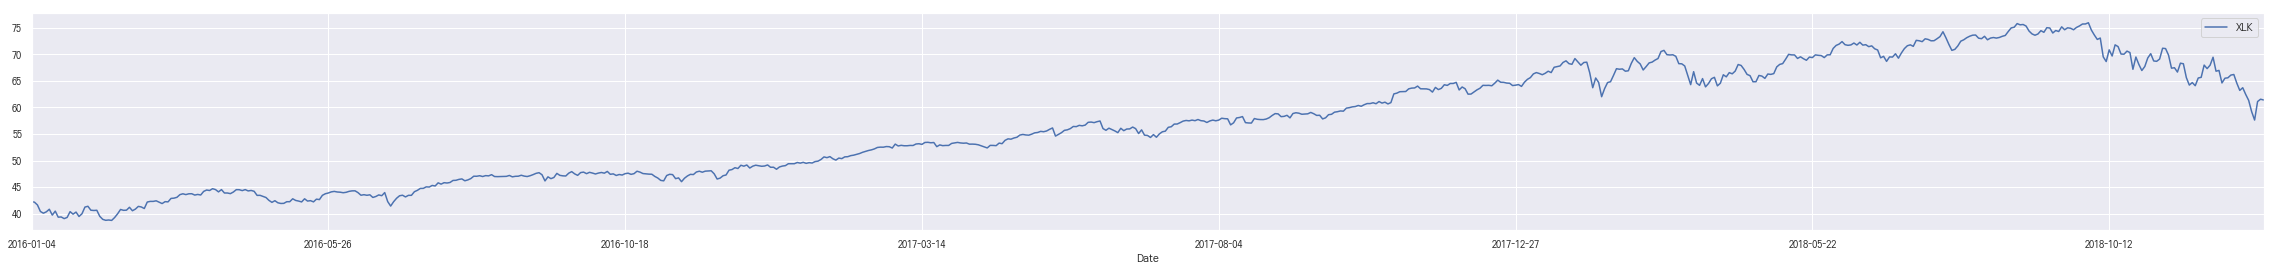

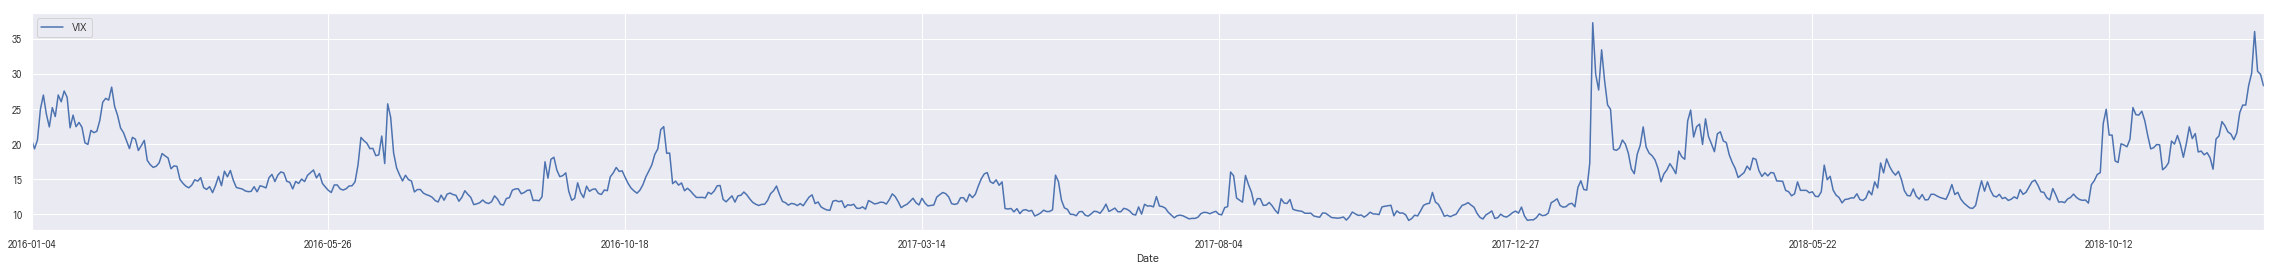

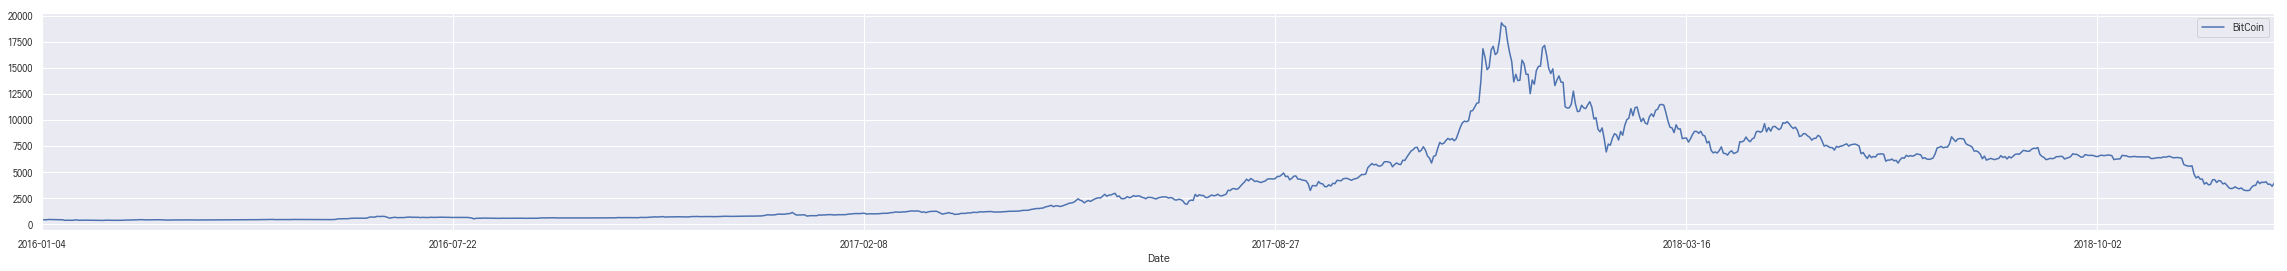

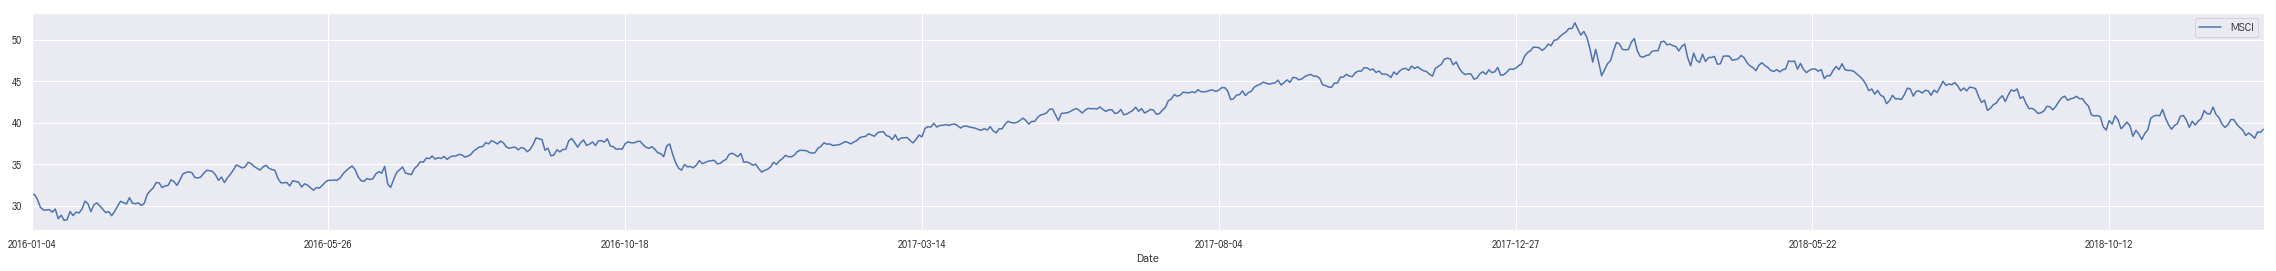

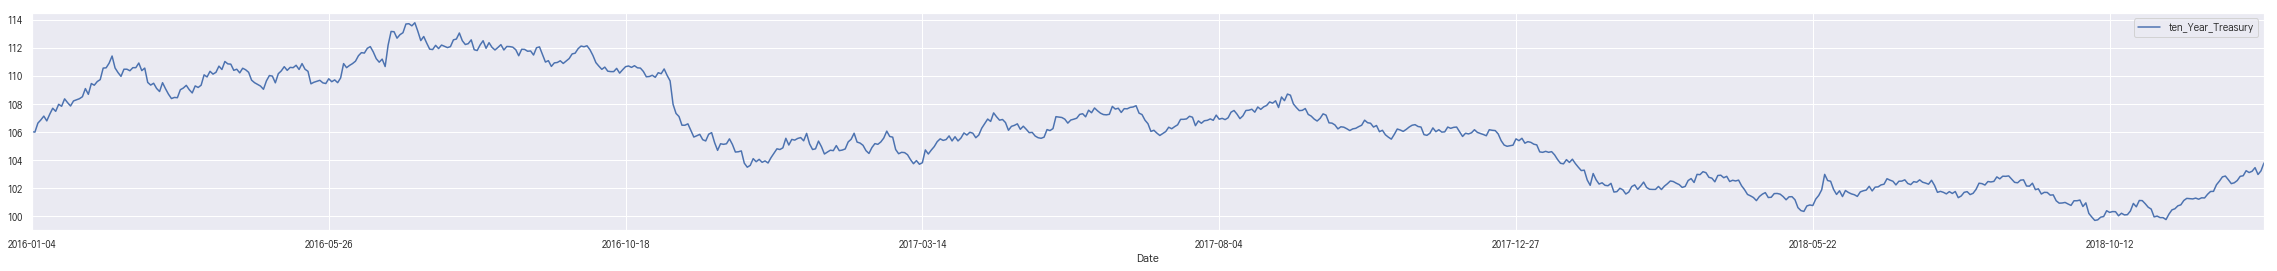

In [18]:
an.isValid(stan_US)

plotting : Samsung_Electronics
plotting : SK_hynix
plotting : LG_Electronics
plotting : 삼성SDI
plotting : 엔씨소프트
plotting : 카카오
plotting : 삼성전기
plotting : LG디스플레이
plotting : 삼성SDS
plotting : 네이버


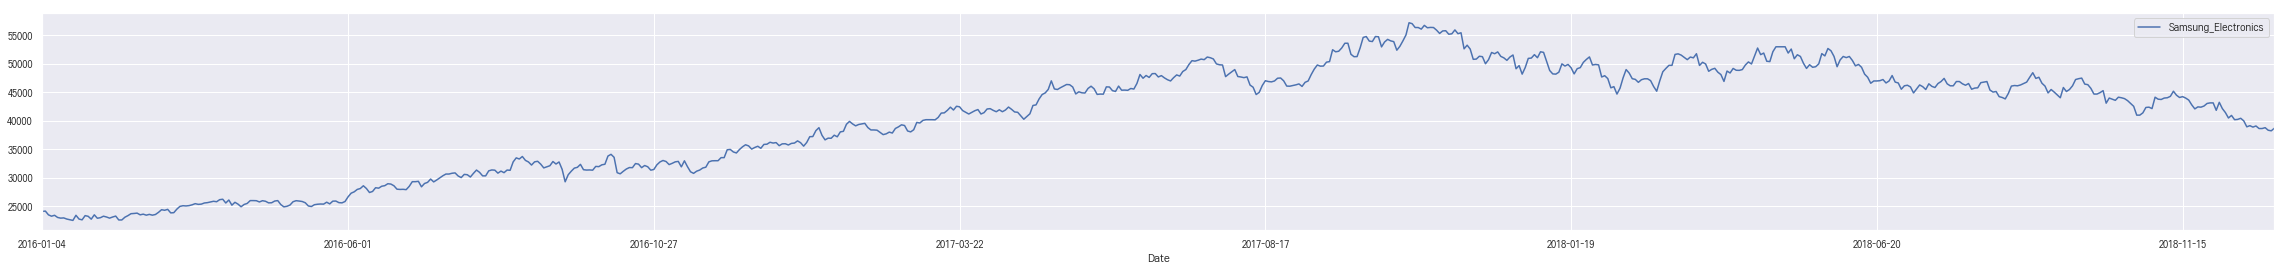

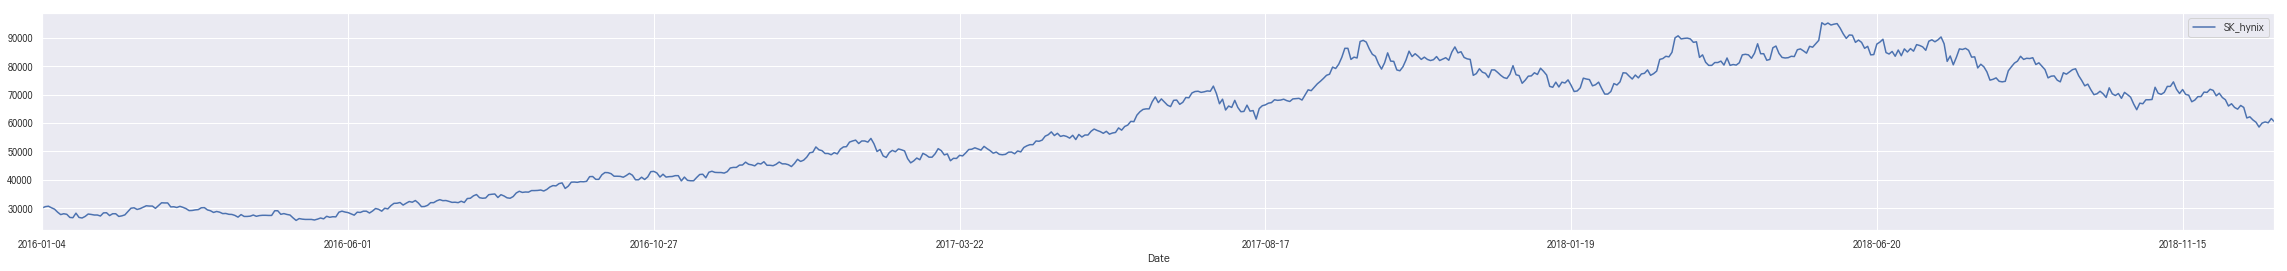

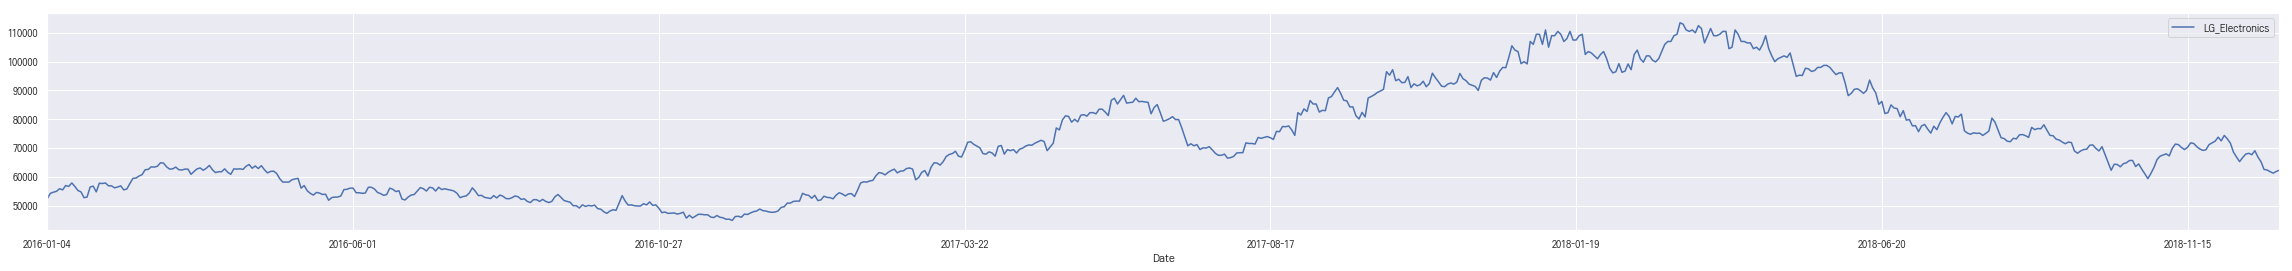

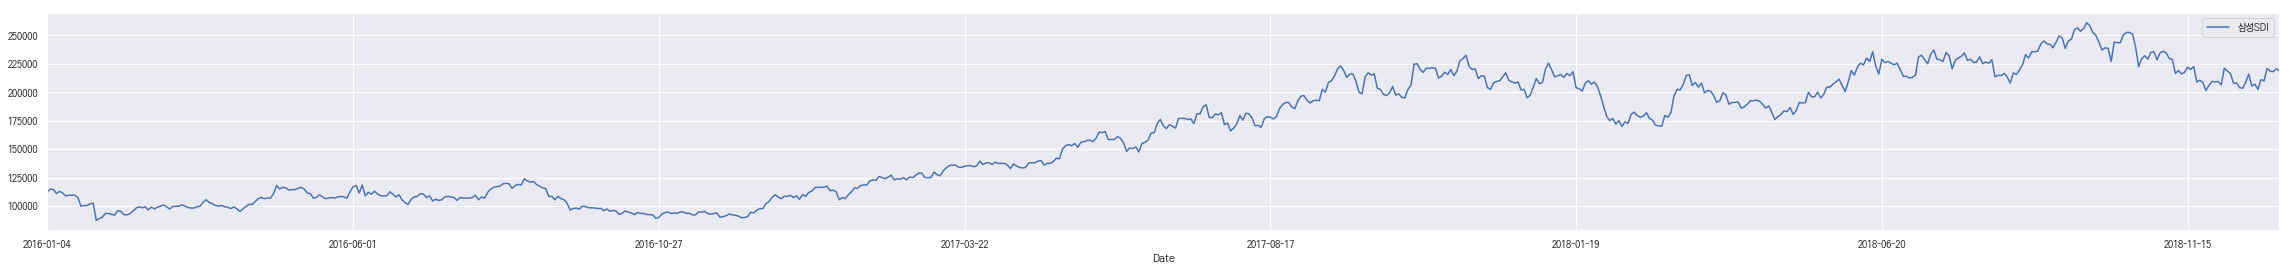

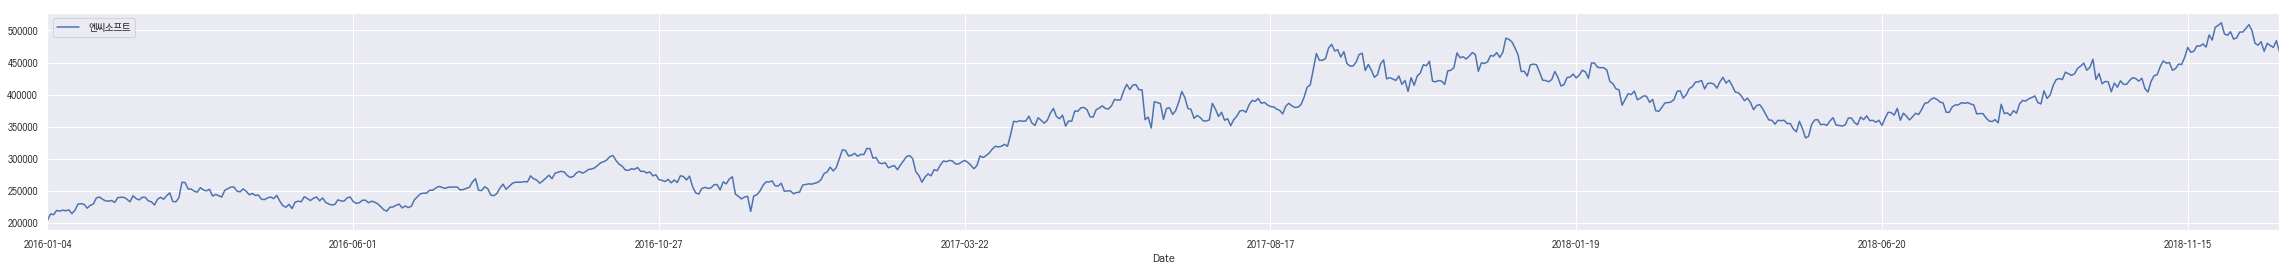

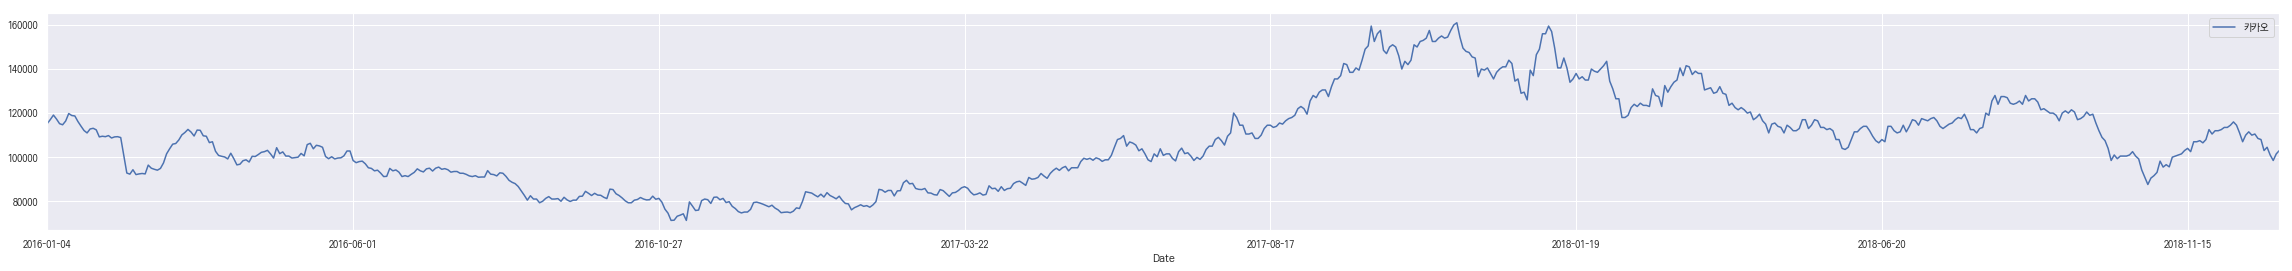

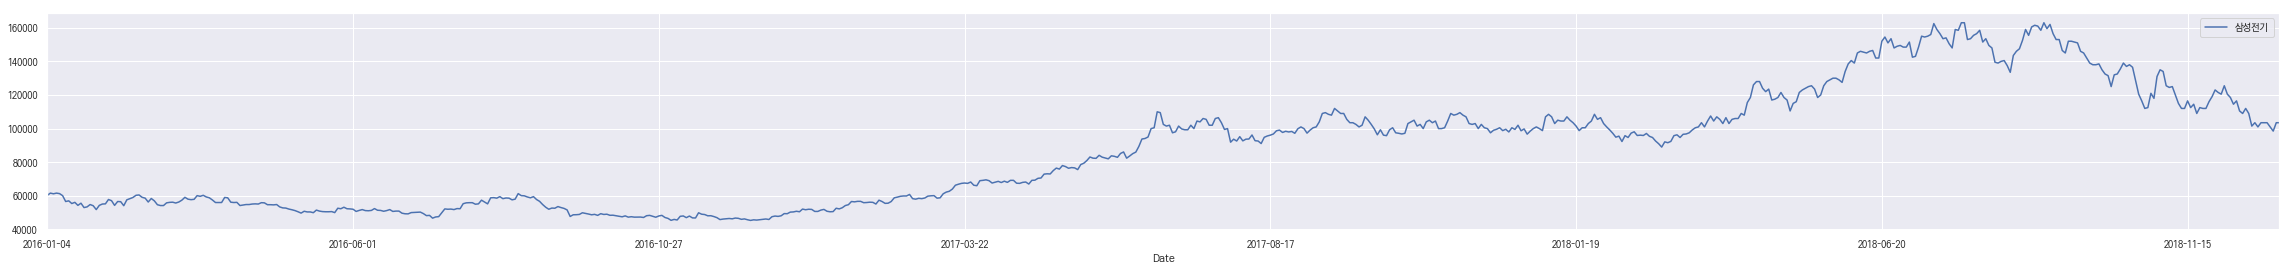

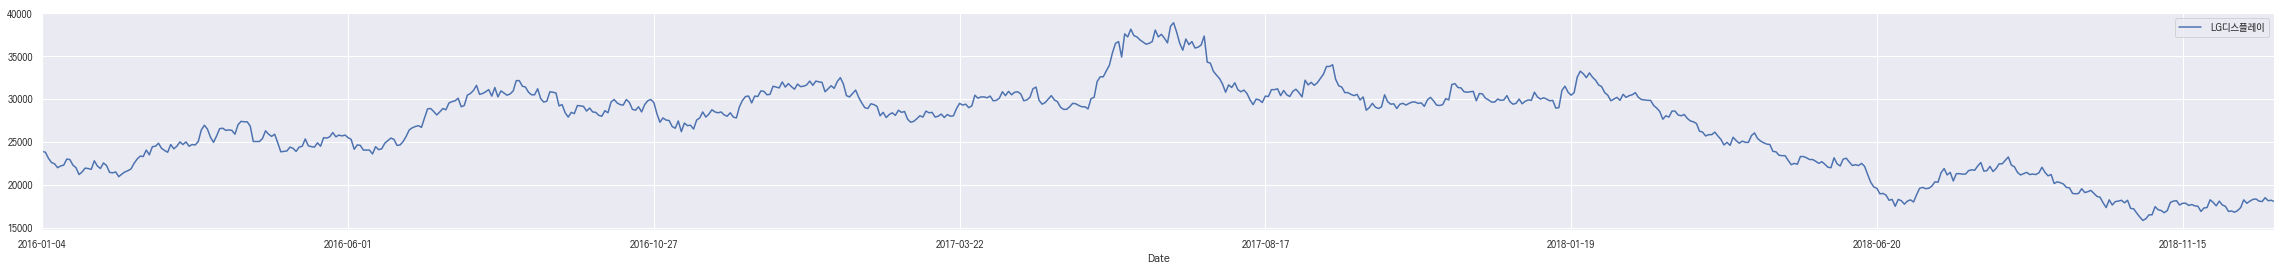

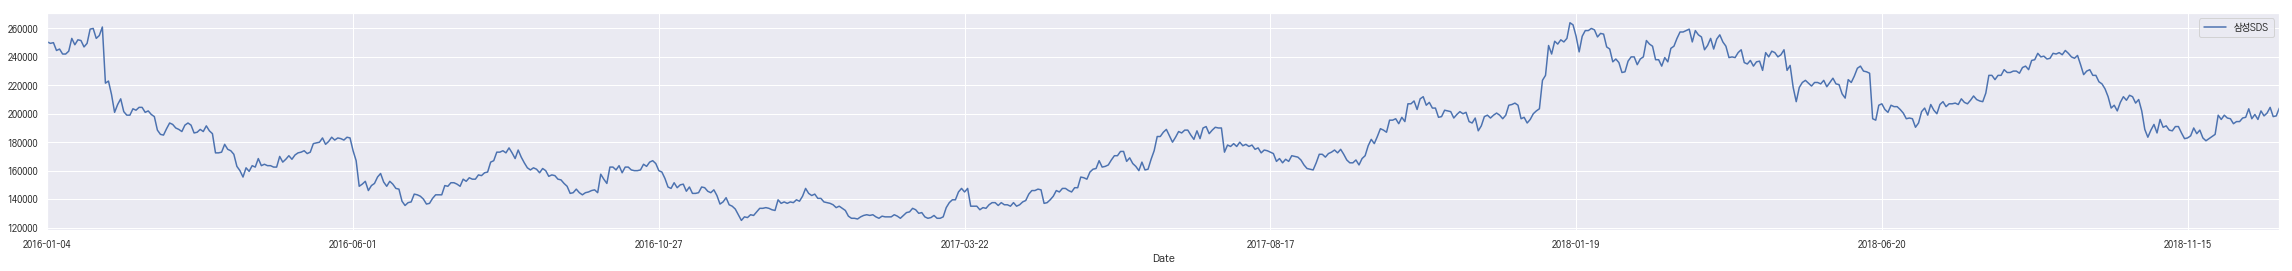

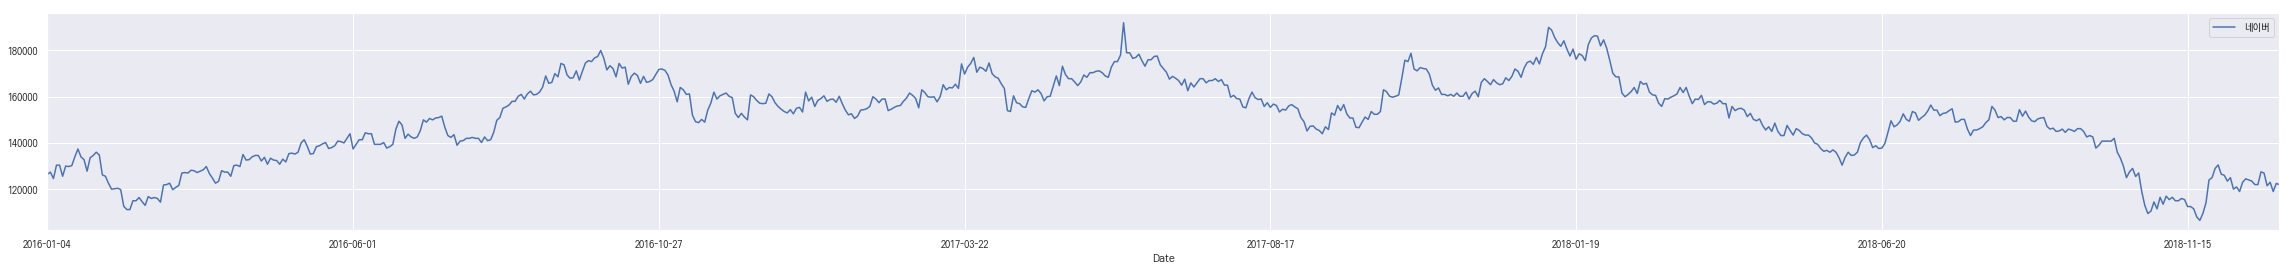

In [19]:
an.isValid(ten_kor)
#an.isValid(ten_US)

# [Symbol List 초기화 & 불러오기](#INDEX)<a name="init"></a>
+ IXT 같은 index 는 잘 안불러진다.
+ 잘 받았는지 검증하는 루틴이 필요함. 

In [ ]:
df = sl.init_symbol_DF()
sl.add_symbol(df,'삼성SDS','018260.KS',init=True)
df = sl.init_symbol_DF()

# [Symbol List 에서 데이터 받기](#INDEX)<a name="down"></a>

TODO::이전에 받은 날짜에 이어서 붙이는거 추가하자.

In [ ]:
sl.download()

# [co-kurtosis WIP](#INDEX)<a name="cokur"></a>
+ how to calculate coskew and cokurtosis
https://stackoverflow.com/questions/41890870/how-to-calculate-coskew-and-cokurtosis

생각을 좀 해봐야겠다.

$$ K(X,X,Y,Y)= {E[(X - E[X])^2(Y - E[Y]^2)] \over \sigma_X^2\sigma_Y^2}$$

# [Joint plot](#INDEX)<a name="joint"></a>
https://seaborn.pydata.org/generated/seaborn.jointplot.html

In [ ]:
for idx in range(0,len(ten_kor)):
    an.joint(ten_kor[idx],index_US)

In [ ]:
for idx in range(0,len(ten_US)):
    an.joint(ten_US[idx],index_kor)